# MLP Image Classifier

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras import losses
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [ ]:
print((X_train.shape, y_train.shape) , (X_test.shape,y_test.shape) , (X_valid.shape,y_valid.shape))

((42500, 32, 32, 3), (42500, 1)) ((10000, 32, 32, 3), (10000, 1)) ((7500, 32, 32, 3), (7500, 1))


In [ ]:
X_train = X_train.flatten().reshape(X_train.shape[0], 32*32*3)
X_test = X_test.flatten().reshape(X_test.shape[0], 32*32*3)
X_valid = X_valid.flatten().reshape(X_valid.shape[0], 32*32*3)

In [ ]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

In [ ]:
model = Sequential()
model.add(Dense(32*32*3, input_shape = (32*32*3,)))
model.add(Activation('relu'))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3072)              9440256   
                                                                 
 activation (Activation)     (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              12587008  
                                                                 
 activation_1 (Activation)   (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              8390656   
                                                                 
 activation_2 (Activation)   (None, 2048)              0

In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=512, validation_data=(X_valid, y_valid)) 

Epoch 1/40
84/84 [==============================] - 6s 36ms/step - loss: 2.1987 - accuracy: 0.1595 - val_loss: 2.0378 - val_accuracy: 0.2445
Epoch 2/40
84/84 [==============================] - 3s 32ms/step - loss: 2.0297 - accuracy: 0.2450 - val_loss: 2.0112 - val_accuracy: 0.2728
Epoch 3/40
84/84 [==============================] - 3s 32ms/step - loss: 1.9444 - accuracy: 0.2888 - val_loss: 1.8250 - val_accuracy: 0.3572
Epoch 4/40
84/84 [==============================] - 3s 32ms/step - loss: 1.8624 - accuracy: 0.3268 - val_loss: 2.1591 - val_accuracy: 0.2741
Epoch 5/40
84/84 [==============================] - 3s 32ms/step - loss: 1.8577 - accuracy: 0.3380 - val_loss: 1.7156 - val_accuracy: 0.3924
Epoch 6/40
84/84 [==============================] - 3s 32ms/step - loss: 1.7629 - accuracy: 0.3728 - val_loss: 1.6833 - val_accuracy: 0.4036
Epoch 7/40
84/84 [==============================] - 3s 32ms/step - loss: 1.7287 - accuracy: 0.3836 - val_loss: 1.7154 - val_accuracy: 0.3959
Epoch 8/40
84

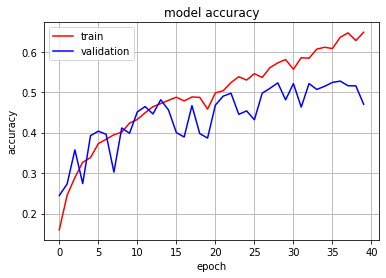

In [ ]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

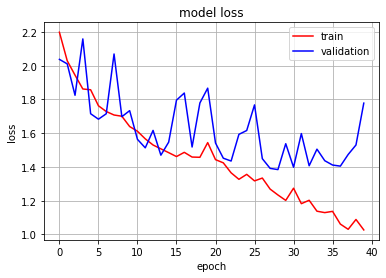

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [ ]:
y_pred = model.predict(X_test);
y_pred = np.argmax(y_pred, axis=1);

313/313 [==============================] - 1s 2ms/step


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.461100
Precision: 0.507821
Recall: 0.461100
F1 score: 0.450321


In [ ]:
target_names = ['airplane', 'automobile', 'bird', 'cat', 
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    airplane       0.72      0.26      0.38      1000
  automobile       0.42      0.74      0.54      1000
        bird       0.52      0.30      0.38      1000
         cat       0.35      0.35      0.35      1000
        deer       0.48      0.37      0.42      1000
         dog       0.51      0.24      0.32      1000
        frog       0.52      0.57      0.55      1000
       horse       0.50      0.57      0.53      1000
        ship       0.71      0.47      0.57      1000
       truck       0.34      0.74      0.47      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



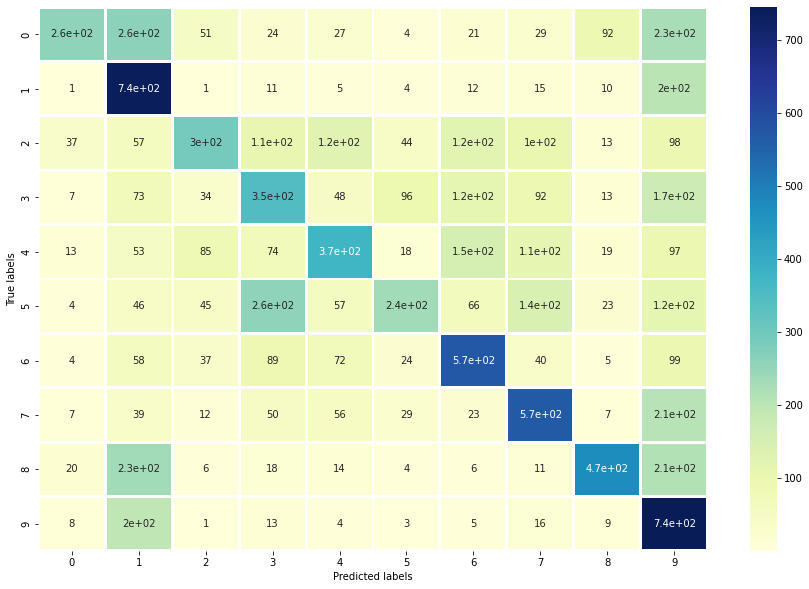

In [ ]:
true = [target_names[int(y)] for y in y_test]
pred = [target_names[y] for y in y_pred]
cm = confusion_matrix(true, pred, labels=target_names)
plt.figure(figsize=(15,10))
sns.heatmap(cm, linewidths=2, annot=True, cmap="YlGnBu");
plt.xlabel('Predicted labels');
plt.ylabel('True labels'); 

In [ ]:
!pip install -q transformers 

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
X_train=X_train[:500]
y_train=y_train[:500]
X_valid=X_valid[:100]
y_valid=y_valid[:100]
X_test=X_test[:100]
y_test=y_test[:100]
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)


In [ ]:
from transformers import BeitFeatureExtractor, BeitForImageClassification
import torch

feature_extractor = BeitFeatureExtractor.from_pretrained("microsoft/beit-base-patch16-224")
Beitmodel = BeitForImageClassification.from_pretrained("microsoft/beit-base-patch16-224")

X_train2=[]
for i in X_train:
    temp=feature_extractor(images=[i]).pixel_values[0]
    X_train2.append(temp)
X_train2=torch.FloatTensor(X_train2)

with torch.no_grad():
    logits = Beitmodel(X_train2).logits

x_t=logits.detach().numpy()
x_t.shape

tensor([257, 156, 285, 353, 779, 253, 833, 472, 407,  32,   9,  10, 339,  32,
        154, 339, 511, 277, 814, 350, 917, 675, 339, 856, 817, 285, 285, 262,
        236, 675, 345, 510, 510, 285,   9, 339, 510, 339, 510,  32, 675, 867,
        281, 404, 675, 283, 274, 867, 675,  10,   9, 245, 351, 856, 895, 510,
        350, 353, 153, 339,   9, 339, 510, 895,  10, 220, 339, 339, 817, 895,
        339, 814,  10, 339, 285, 339, 404, 346, 744, 473,  31, 817, 351, 339,
        676, 675, 351,   9, 917, 975, 185, 510, 274, 339, 510, 339, 339, 766,
         32, 160, 353, 152, 351,   9, 817, 817, 271, 235, 353, 867,  32, 350,
        165, 751, 482, 995, 330, 154, 282, 153, 332,  32, 656, 494, 675, 895,
        339, 351, 404, 339,  32,  32, 895, 353,  98, 339, 151, 339, 285, 351,
        281, 908, 510, 267, 259,  32,  31, 262, 339, 817,  32, 351, 817, 171,
        165, 908,  80,  32, 510, 244, 285, 352, 536,   9, 408, 339,  27, 339,
         29, 751,  32, 627, 675, 675, 351, 194, 817, 895, 675, 3

(500, 1000)

In [ ]:
X_val2=[]
for i in X_valid:
    temp=feature_extractor(images=[i]).pixel_values[0]
    X_val2.append(temp)
X_val2=torch.FloatTensor(X_val2)

with torch.no_grad():
    logits = Beitmodel(X_val2).logits


x_val=logits.detach().numpy()
x_val.shape

tensor([374, 339, 361,  32, 510, 511,  10, 555, 204,  10, 510,  32, 803, 404,
        188, 281,  10, 339, 353, 281, 625, 717,  32, 867, 511, 436, 510, 996,
        348,  10, 339, 867, 234, 780, 856, 511, 408, 536, 517, 473, 511,  32,
        156, 351, 231, 339, 404, 352, 339,   9, 351, 555,  47,  80, 656, 353,
        675, 675, 814,  30,  92,   9, 283, 248, 154, 675,  32, 353, 339,  32,
        511, 510, 154, 867, 908, 339, 339, 353,   9, 339,  32, 352, 101, 285,
         86,  10, 675, 675, 351, 280,  32,  31, 339,  32,   9, 814, 675, 516,
        404, 358])


(100, 1000)

In [ ]:
X_tst2=[]
for i in X_test:
    temp=feature_extractor(images=[i]).pixel_values[0]
    X_tst2.append(temp)
X_tst2=torch.FloatTensor(X_val2)

with torch.no_grad():
    logits = Beitmodel(X_tst2).logits

x_tst=logits.detach().numpy()
x_tst.shape

(100, 1000)

In [ ]:
print(X_train2.shape)
print(X_val2.shape)

torch.Size([500, 3, 224, 224])
torch.Size([100, 3, 224, 224])


In [ ]:
model = Sequential()
model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
hist = model.fit(x_t, y_train, epochs= 10, batch_size= 18, validation_data=(x_val, y_valid))

Epoch 1/10
28/28 [==============================] - 1s 8ms/step - loss: 1.6663 - accuracy: 0.4960 - val_loss: 0.8927 - val_accuracy: 0.8600
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 0.5599 - accuracy: 0.9060 - val_loss: 0.3599 - val_accuracy: 0.9200
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 0.2432 - accuracy: 0.9580 - val_loss: 0.2517 - val_accuracy: 0.9500
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: 0.1507 - accuracy: 0.9860 - val_loss: 0.2073 - val_accuracy: 0.9500
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9860 - val_loss: 0.1942 - val_accuracy: 0.9500
Epoch 6/10
28/28 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.9900 - val_loss: 0.1871 - val_accuracy: 0.9600
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9940 - val_loss: 0.1810 - val_accuracy: 0.9600
Epoch 8/10
28/28 [==

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 activation_3 (Activation)   (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                64064     
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 activation_5 (Activation)   (None, 10)               

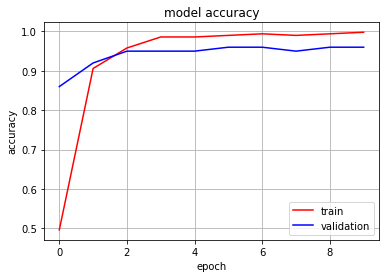

In [ ]:
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

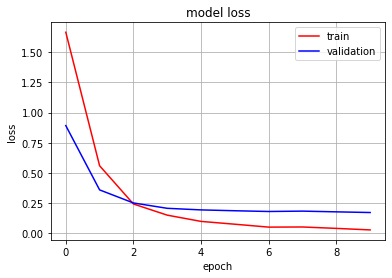

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [ ]:
y_pred = model.predict(x_tst);
y_pred = np.argmax(y_pred, axis=1);

4/4 [==============================] - 0s 4ms/step
